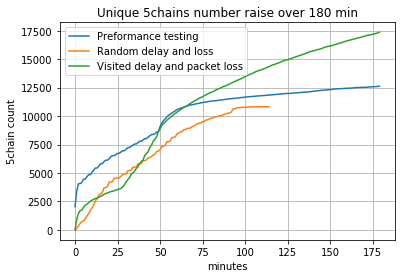

In [33]:
import csv

def statReadFile(inFile):
    randLog = csv.reader(open(inFile, newline=''), delimiter=':', quotechar='"')
    res = []
    for row in randLog:
        if len(row) == 4:
            res.append([int(row[0]),int(row[1]),int(row[2]),int(row[3])])
    
    return res

def statFromRange(rangeData, stat, minuteId):
    window = list()
    WINDOW_SIZE = 5
    coms = {}
    
    for row in rangeData:
        #print(maxSize)
        if (minuteId == -1 or row[0] == minuteId):
            com = str(row[1])[4:5] + "_" + str(row[2])

            if coms.get(com,0) == 0:
                coms.update({com : 1})

            window.append(com)

            if len(window) == WINDOW_SIZE:
                val5 = "->".join(window)
                #stat.update({'asdf',1})
                stat.update({val5 : stat.get(val5,0) + 1})
                window.pop(0)

    return stat


def chartDataStat(logData, maxMin, statLog):
    chartLog = []

    for i in range(maxMin):
        #print(i)
        statLog = statFromRange(logData, statLog, i)
        partRes = sorted(statLog.values(),reverse=True)
        chartLog.append([len(partRes)])

    return chartLog

noLogData = statReadFile("black_no_node3_cl200_r10000_t5k_X10_3h_timed.log")
noStatData = {}
chartNoLog = chartDataStat(noLogData,180, noStatData)

#todo: 6pm 21May
rndLogData = statReadFile("black_rnd_node3_cl200_r50_t5k_X10_3h_timed_old.log")
rndStatData = {}
chartRndLog = chartDataStat(rndLogData, 115, rndStatData)

#todo: 9pm 21May
#expLogData = statReadFile("black_exp_node3_cl200_r50_t5k_X10_3h_timed.log")
#chartExpLog = chartDataStat(expLogData,105)

#expSqrData = statReadFile("black_sqr_node3_cl200_r50_t5k_X10_3h_timed.log")
#chartSqrLog = chartDataStat(expSqrData,105)

linSqrData = statReadFile("black_liniar_node3_cl200_r50_t5k_X10_3h_timed.log")
linStatData = {}
chartLinLog = chartDataStat(linSqrData,180, linStatData)


import matplotlib.pyplot as timePlot
#timePlot.plot(chartNoLog)

timePlot.title("Unique 5chains number raise over 180 min")
timePlot.xlabel("minutes")
timePlot.ylabel("5chain count")
timePlot.plot(chartNoLog, label="Preformance testing")
timePlot.plot(chartRndLog, label="Random delay and loss")
timePlot.plot(chartLinLog, label="Visited delay and packet loss")
timePlot.legend()
timePlot.grid(True)
timePlot.show()



In [34]:
def CompareVisiting(left, right, leftName, rightName):
    mergedRes = []
    sumRndBased = 0.0
    sumExpBased = 0.0

    for v in left.items():
        exVal = right.get(v[0],0)
        mergedRes.append([v[0],v[1],exVal])
        sumExpBased += 1 if v[1] < exVal else exVal/v[1]
        if (exVal > 0) :
            sumRndBased += 1 if exVal < v[1] else v[1]/exVal

    topVals100 = sorted(mergedRes, key=lambda x: x[1],reverse=True)

    print("RESULT: visited routes have rather good coverage of RND rows: {:.2f}%".format(sumExpBased/len(left)*100))
    print("{:<60} {:<5} {:<5}".format('5chain sorted by RND descending', leftName, rightName))
    for v in topVals100[0:20]:
        print("{:<60} {:<5} {:<5}".format(v[0],v[1],v[2]))
    


allComb = 15**5
print('Performance testing length: {}, from: {}, coverage: {:.2f}%'.format(len(noStatData), allComb, len(noStatData)/allComb*100))
print('Random visited length: {}, from: {}, coverage: {:.2f}%'.format(len(rndStatData), allComb, len(rndStatData)/allComb*100))
print('Visited delay length: {}, from: {}, coverage: {:.2f}%'.format(len(linStatData), allComb, len(linStatData)/allComb*100))
print("")

#CompareVisiting(rndStatData, linStatData, 'rnd', 'vis')
#CompareVisiting(linStatData, rndStatData, 'vis', 'rnd')



Performance testing length: 12614, from: 759375, coverage: 1.66%
Random visited length: 10819, from: 759375, coverage: 1.42%
Visited delay length: 17361, from: 759375, coverage: 2.29%



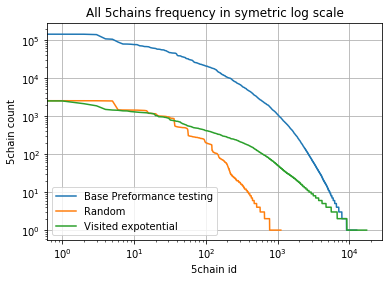

In [31]:
import matplotlib.pyplot as plt


noRes = sorted(noStatData.values(),reverse=True)
linRes = sorted(linStatData.values(),reverse=True)
rndRes = sorted(rndStatData.values(),reverse=True)

plt.title("All 5chains frequency in symetric log scale")
plt.xlabel("5chain id")
plt.ylabel("5chain count")
plt.yscale('log')
plt.xscale('log')
plt.plot(noRes, label="Preformance testing")
plt.plot(rndRes, label="Random delay and loss")
plt.plot(linRes, label="Visited delay and packet loss")
plt.legend()
plt.grid(True)
plt.show()

